In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm #progress bar

### Definindo as funções

In [2]:
def slant(p,tau,data1,dx,dt,t_ini,x_ini):
    # Retorna a semblance da reta dada por p, tau
    #p = angulo (s/m)
    #tau = tempo (s)
    # data1 = dado [s,m]
    # dt [s]
    # x_ini [coordenada do grid]
    
    [nt1,ntr1]=data1.shape
    dataC = data1.copy()
    #ct2= nt1/2
    #cx2= (ntr1)*dx/2
    x = np.arange(x_ini*dx,(x_ini+ntr1)*dx,dx)
    t = tau + p*x
    #x = np.arange(0,ntr1*dx,dx)
    #t = tau + p*x
    
    t_grid = np.int64(np.round(t/dt)-t_ini)
    x_grid = np.int64((np.round(x/dx))-x_ini)
    s_n = 0
    s_d = 0
    
    plot = "no"  
    
    for k in range(ntr1):
        
        if (t_grid[k]<nt1) & (t_grid[k]>=0):
            #print(f"dataC[t_grid[k],x_grid[k]]={dataC[t_grid[k],x_grid[k]]}")
            #print(f"k={k}")
            #print(f"t_grid[k]={t_grid[k]}")
            #print(f"x_grid[k]={x_grid[k]}")
            
            s_n += dataC[t_grid[k],x_grid[k]]
            s_d += dataC[t_grid[k],x_grid[k]]**2
            
            if plot == "yes":
                dataCC=data1.copy()
                dataCC[t_grid[k],x_grid[k]] = .5
                plt.imshow(dataC, extent=[0, ntr1,nt1*dt, 0])
                plt.imshow(dataCC, extent=[0, ntr1,nt1*dt, 0])
                plt.axis('auto')
                plt.plot(x,t,'r',label="t (x) = tau + p*x \nt (x) = %s + %s*x" % (tau,p))
                plt.legend()
                #plt.ylim([nt*dt,0])
                #plt.xlim([0,ntr])
                plt.colorbar()
                plt.show()
                
        #else:
        #    print(f"t_grid[k]={t_grid[k]}")
    
    if s_d == 0:
        #print('sd = 0, sn =',s_n)
        #print(f"p={p}")
        #print(f"tau={tau}")
        #print(f"dataC[t_grid[k],x_grid[k]]={dataC[t_grid[k],x_grid[k]]}")
        s=0 #posso fazer isso?
    
    else:
        s = s_n**2/ntr1/s_d

        
    return s, x_grid, t_grid
    #return s, x, t

In [3]:
def slant_stack(pmin,pmax,dp,taumin, taumax, dtau,data1,dx,dt,t_ini,x_ini):
    """
    Retorna um painel de semblane
    e a semblance máxima para um conjunto de retas
    pmin, pmax (angulos minimo e maximo)
    taumin taumax (tempos -- x=0 -- minimo e maximo (em segundos))
    data1, dx, e dt referem-se ao dado
    x_ini é a primeira amostra em x [grid coord]
    """
    p = np.arange(pmin,pmax,dp)
    tau = np.arange(taumin,taumax,dtau)
    # S é o painel que retorna a semblance para cada par (tau,p)
    S = np.zeros([len(tau),len(p)])
    Smax = 0
    for ip in (range(len(p))):
        for itau in range(len(tau)):
            S[itau,ip],x,t=slant(p[ip],tau[itau],data1,dx,dt,t_ini,x_ini)
            if S[itau,ip]>Smax:
                Smax = S[itau,ip]
                pmax=p[ip]
                taumax=tau[itau]
                i_pmax=ip
                i_taumax=itau
    return S, pmax, taumax, Smax, ip, itau

### Criando o modelo 

cos(theta2)*dt =  0.0016323282472535678
nt/2 =  0.24


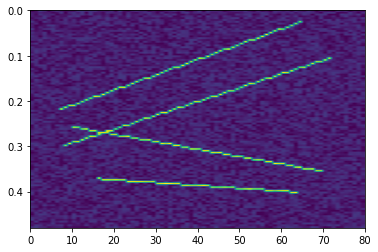

In [4]:
#nt=nz=85 
#ntr=100
#dt=0.005

dx=1
nt=120
ntr=80 
dt=0.004

MOD = np.zeros([ntr,nt])

x_ini_1 = int(np.round(1*ntr/5))
x_fim_1 = int(np.round(4*ntr/5))

x_ini_2 = int(np.round(1*ntr/8))
x_fim_2 = int(np.round(7*ntr/8))

x_ini_3 = int(np.round(1*ntr/10))
x_fim_3 = int(np.round(9*ntr/10))

x_ini_4 = int(np.round(1*ntr/11))
x_fim_4 = int(np.round(9*ntr/11))

theta=30
theta2=20
theta3=15
theta4=10
    
for i in range(x_ini_1,x_fim_1):
    z = int(np.round(i*np.cos(theta)) + np.round(3*nt/4))
    MOD[i,z]=1
    
for i in range(x_ini_2,x_fim_2):
    z = int(np.round(i*np.cos(theta2)) + np.round(nt/2))
    MOD[i,z]=1
              
for i in range(x_ini_3,x_fim_3):
    z = int(np.round(i*np.cos(theta3)) + np.round(2*nt/3))
    MOD[i,z]=1
              
for i in range(x_ini_4,x_fim_4):
    z = int(np.round(i*np.cos(theta4)) + np.round(nt/2))
    MOD[i,z]=1
              

nn = np.random.rand(ntr,nt)
MOD = MOD+(nn-0.5)*0.2

print('cos(theta2)*dt = ',np.cos(theta2)*dt)
print('nt/2 = ',nt/2*dt)
plt.imshow(MOD.T, aspect="auto", extent=[0,dx*ntr,nt*dt,0])
plt.show()

### Rodando o slant_stack no modelo para achar o p e tau dos refletores

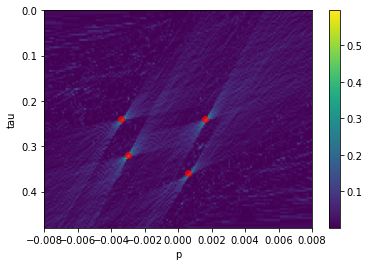

pmax MOD1 = 0.0005999999999999478
taumax MOD1 = 0.36
pmax MOD2 = 0.0015999999999999417
taumax MOD2 = 0.24
pmax MOD3 = -0.0030000000000000304
taumax MOD3 = 0.32
pmax MOD4 = -0.003400000000000028
taumax MOD4 = 0.24


In [5]:
MOD1 = np.zeros([ntr,nt])
MOD2 = np.zeros([ntr,nt])
MOD3 = np.zeros([ntr,nt])
MOD4 = np.zeros([ntr,nt])

x_ini_1 = int(np.round(1*ntr/5))
x_fim_1 = int(np.round(4*ntr/5))

x_ini_2 = int(np.round(1*ntr/8))
x_fim_2 = int(np.round(7*ntr/8))

x_ini_3 = int(np.round(1*ntr/10))
x_fim_3 = int(np.round(9*ntr/10))

x_ini_4 = int(np.round(1*ntr/11))
x_fim_4 = int(np.round(9*ntr/11))

theta=30
theta2=20
theta3=15
theta4=10
    
for i in range(x_ini_1,x_fim_1):
    z = int(np.round(i*np.cos(theta)) + np.round(3*nt/4))
    MOD1[i,z]=1
    
for i in range(x_ini_2,x_fim_2):
    z = int(np.round(i*np.cos(theta2)) + np.round(nt/2))
    MOD2[i,z]=1
              
for i in range(x_ini_3,x_fim_3):
    z = int(np.round(i*np.cos(theta3)) + np.round(2*nt/3))
    MOD3[i,z]=1
              
for i in range(x_ini_4,x_fim_4):
    z = int(np.round(i*np.cos(theta4)) + np.round(nt/2))
    MOD4[i,z]=1

    
nn = np.random.rand(ntr,nt)
MOD1 = MOD1+(nn-0.5)*0.2
MOD2 = MOD2+(nn-0.5)*0.2
MOD3 = MOD3+(nn-0.5)*0.2
MOD4 = MOD4+(nn-0.5)*0.2

pmin=-0.008
pmax=0.008
dp=0.0001

S,pmaxS,taumaxS,smax,ip,itau = slant_stack(pmin,pmax,dp,0,nt*dt,dt,MOD.T,1.0,dt,0,0)
S1,pmaxS1,taumaxS1,smax1,ip1,itau1 = slant_stack(pmin,pmax,dp,0,nt*dt,dt,MOD1.T,1.0,dt,0,0)
S2,pmaxS2,taumaxS2,smax2,ip2,itau2 = slant_stack(pmin,pmax,dp,0,nt*dt,dt,MOD2.T,1.0,dt,0,0)
S3,pmaxS3,taumaxS3,smax3,ip3,itau3 = slant_stack(pmin,pmax,dp,0,nt*dt,dt,MOD3.T,1.0,dt,0,0)
S4,pmaxS4,taumaxS4,smax4,ip4,itau4 = slant_stack(pmin,pmax,dp,0,nt*dt,dt,MOD4.T,1.0,dt,0,0)

plt.imshow(S,extent=[pmin,pmax,nt*dt,0],aspect="auto")
plt.plot(pmaxS1,taumaxS1,'or', alpha=.7)
plt.plot(pmaxS2,taumaxS2,'or', alpha=.7)
plt.plot(pmaxS3,taumaxS3,'or', alpha=.7)
plt.plot(pmaxS4,taumaxS4,'or', alpha=.7)
plt.colorbar()
plt.xlabel('p')
plt.ylabel('tau')
plt.show()

print("pmax MOD1 =", pmaxS1)
print("taumax MOD1 =", taumaxS1)

print("pmax MOD2 =", pmaxS2)
print("taumax MOD2 =", taumaxS2)

print("pmax MOD3 =", pmaxS3)
print("taumax MOD3 =", taumaxS3)

print("pmax MOD4 =", pmaxS4)
print("taumax MOD4 =", taumaxS4)

In [13]:
def local_windowS(data1,xwin,twin,dx,dt,p,tau,t_ini,x_ini):
    """
    data1: dado, conferir se precisa ser data1.T
    xwin: tamanho da janela em x (grid coord.)
    twin: tamanho da janela em t (grid coord.) 
    pmin,pmax,dp: referente ao angulo (cos(theta)*dt/dx)
    dx,dt: discretização do modelo data1
    
    t_ini, x_ini (grid coord.)
    Retorna duas matrizes com dimensões de data1: 
    m_taumax e m_pmax, em que cada célula armazena os valores máximos de tau e p para aquele ponto no modelo
    """
    
    
    #[ntr1,nt1]=data1.shape
    [ntr1,nt1] = data1.T.shape
    
    #m_taumax=np.zeros([ntr1,nt1])
    #m_taumax = np.zeros(data1.shape)
    #m_pmax = np.zeros(data1.shape)
    
    #for i in tqdm(range(0,nt1)): #0 a 61, eixo t
     #   for j in range(0,ntr1): #0 a 32, eixo x
            
    
    #x_ini=0
    #x_fim=(j+xwin)*dx
    #W=data1[0:(j+xwin),0:(i+twin)]#aqui tem chance de eu sequelar...
    W=data1[t_ini:(t_ini+twin),x_ini:(x_ini+xwin)]#aqui tem chance de eu sequelar...
    #print('W.shape =',W.shape)

    s, x_grid, t_grid = slant(p,tau,W,dx,dt,t_ini,x_ini)
    
    #plt.imshow(W, extent=[x_ini*dx,(x_ini+xwin)*dx,(t_ini+twin)*dt,t_ini*dt],aspect='auto')
    #plt.plot((x_ini+ x_grid)*dx,(t_ini+t_grid)*dt,'r')
    return s

In [9]:
p=0.0016
tau=0.128
t_ini=20
x_ini=5
t_win=20
x_win=5
print(dx,dt,p,tau,t_ini,x_ini)
s = local_windowS(MOD.T,x_win,t_win,dx,dt,p,tau,t_ini,x_ini)

print('tau deve estar entre {} e {}'.format(t_ini*dt,(t_ini+t_win)*dt))
print('semblance = ',s)

1 0.004 0.0016 0.128 20 5
tau deve estar entre 0.08 e 0.16
semblance =  0.9951580674528266


In [14]:
def local_window(data1,xwin,twin,dx,dt):
    """
    data1: dado, conferir se precisa ser data1.T
    xwin: tamanho da janela em x (grid coord.)
    twin: tamanho da janela em t (grid coord.) 
    pmin,pmax,dp: referente ao angulo (cos(theta)*dt/dx)
    dx,dt: discretização do modelo data1
    
    Retorna duas matrizes com dimensões de data1: 
    m_taumax e m_pmax, em que cada célula armazena os valores máximos de tau e p para aquele ponto no modelo
    """
    
    dp=0.0001
    pmin=-0.0032
    pmax=0.0032
    p = np.arange(pmin,pmax,dp)
    
    #[ntr1,nt1]=data1.shape
    [ntr1,nt1] = data1.T.shape
    
    #m_taumax=np.zeros([ntr1,nt1])
    m_taumax = np.zeros(data1.shape)
    m_pmax = np.zeros(data1.shape)
    s_max = np.zeros(data1.shape)

    
    for i in tqdm(range(0,nt1)): #0 a 61, eixo t
        for j in range(0,ntr1): #0 a 32, eixo x
            #Caso A
            if (i-np.int64(twin/2))<=0:
                t_ini=0 #t_ini em grid
                twinA=np.int64(twin/2)+i
                tau = np.arange(t_ini*dt, (t_ini+twinA)*dt,dt)
                #Caso A1
                if (j-np.int64(xwin/2))<=0:
                    #print("1")
                    x_ini=0
                    xwinA=np.int64(xwin/2)+j
                    smax = 0
                    pmaxS = 0
                    taumaxS = 0
                    for ip in p:
                        for itau in tau:
                            s = local_windowS(data1,xwinA,twinA,dx,dt,ip,itau,t_ini,x_ini)
                            if s>smax:
                                smax = s
                                pmaxS = ip
                                taumaxS = itau
                    
                    m_taumax[i,j]=taumaxS
                    m_pmax[i,j]=pmaxS
                    s_max[i,j]=smax
                    
                #Caso A2
                elif (j-np.int64(xwin/2))>0 and (j+np.int64(xwin/2))<ntr1:
                    #print("2")
                    x_ini=j-np.int64(xwin/2)
                    xwinA= xwin
                    smax = 0
                    pmaxS = 0
                    taumaxS = 0
                    for ip in p:
                        for itau in tau:
                            s = local_windowS(data1,xwinA,twinA,dx,dt,ip,itau,t_ini,x_ini)
                            if s>smax:
                                smax = s
                                pmaxS = ip
                                taumaxS = itau
                    
                    m_taumax[i,j]=taumaxS
                    m_pmax[i,j]=pmaxS
                    s_max[i,j]=smax
                
                # Caso A3
                elif (j+np.int64(xwin/2))>=ntr1:
                    #print("3")
                    x_ini=j-np.int64(xwin/2)
                    xwinA= xwin - (j + np.int64(xwin/2) - ntr1)
                    smax = 0
                    pmaxS = 0
                    taumaxS = 0
                    for ip in p:
                        for itau in tau:
                            s = local_windowS(data1,xwinA,twinA,dx,dt,ip,itau,t_ini,x_ini)
                            if s>smax:
                                smax = s
                                pmaxS = ip
                                taumaxS = itau
                    
                    m_taumax[i,j]=taumaxS
                    m_pmax[i,j]=pmaxS
                    s_max[i,j]=smax
            
            #Caso B
            elif (i+np.int64(twin/2))>=nt1:
                t_ini=(i-np.int64(twin/2))
                twinA=twin - (i + np.int64(twin/2) - nt1)
                tau = np.arange(t_ini*dt, (t_ini+twinA)*dt,dt)
                #Caso B1
                if (j-np.int64(xwin/2))<=0:
                    #print("1")
                    x_ini=0
                    xwinA=np.int64(xwin/2)+j
                    smax = 0
                    pmaxS = 0
                    taumaxS = 0
                    for ip in p:
                        for itau in tau:
                            s = local_windowS(data1,xwinA,twinA,dx,dt,ip,itau,t_ini,x_ini)
                            if s>smax:
                                smax = s
                                pmaxS = ip
                                taumaxS = itau
                    
                    m_taumax[i,j]=taumaxS
                    m_pmax[i,j]=pmaxS
                    s_max[i,j]=smax
                    
                #Caso B2
                elif (j-np.int64(xwin/2))>0 and (j+np.int64(xwin/2))<ntr1:
                    #print("2")
                    x_ini=j-np.int64(xwin/2)
                    xwinA= xwin
                    smax = 0
                    pmaxS = 0
                    taumaxS = 0
                    for ip in p:
                        for itau in tau:
                            s = local_windowS(data1,xwinA,twinA,dx,dt,ip,itau,t_ini,x_ini)
                            if s>smax:
                                smax = s
                                pmaxS = ip
                                taumaxS = itau
                    
                    m_taumax[i,j]=taumaxS
                    m_pmax[i,j]=pmaxS
                    s_max[i,j]=smax
                
                # Caso B3
                elif (j+np.int64(xwin/2))>=ntr1:
                    #print("3")
                    x_ini=j-np.int64(xwin/2)
                    xwinA= xwin - (j + np.int64(xwin/2) - ntr1)
                    smax = 0
                    pmaxS = 0
                    taumaxS = 0
                    for ip in p:
                        for itau in tau:
                            s = local_windowS(data1,xwinA,twinA,dx,dt,ip,itau,t_ini,x_ini)
                            if s>smax:
                                smax = s
                                pmaxS = ip
                                taumaxS = itau
                    
                    m_taumax[i,j]=taumaxS
                    m_pmax[i,j]=pmaxS
                    s_max[i,j]=smax
            # Caso C 
            elif (i-np.int64(twin/2))>0 and (i+np.int64(twin/2))<nt1:
                t_ini=(i-np.int64(twin/2))
                twinA = twin
                tau = np.arange(t_ini*dt, (t_ini+twinA)*dt,dt)
                #Caso C1
                if (j-np.int64(xwin/2))<=0:
                    #print("1")
                    x_ini=0
                    xwinA=np.int64(xwin/2)+j
                    smax = 0
                    pmaxS = 0
                    taumaxS = 0
                    for ip in p:
                        for itau in tau:
                            s = local_windowS(data1,xwinA,twinA,dx,dt,ip,itau,t_ini,x_ini)
                            if s>smax:
                                smax = s
                                pmaxS = ip
                                taumaxS = itau
                    
                    m_taumax[i,j]=taumaxS
                    m_pmax[i,j]=pmaxS
                    s_max[i,j]=smax
                    
                #Caso C2
                elif (j-np.int64(xwin/2))>0 and (j+np.int64(xwin/2))<ntr1:
                    #print("2")
                    x_ini=j-np.int64(xwin/2)
                    xwinA= xwin
                    smax = 0
                    pmaxS = 0
                    taumaxS = 0
                    for ip in p:
                        for itau in tau:
                            s = local_windowS(data1,xwinA,twinA,dx,dt,ip,itau,t_ini,x_ini)
                            if s>smax:
                                smax = s
                                pmaxS = ip
                                taumaxS = itau
                    
                    m_taumax[i,j]=taumaxS
                    m_pmax[i,j]=pmaxS
                    s_max[i,j]=smax
               
                # Caso C3
                elif (j+np.int64(xwin/2))>=ntr1:
                    #print("3")
                    x_ini=j-np.int64(xwin/2)
                    xwinA= xwin - (j + np.int64(xwin/2) - ntr1)
                    smax = 0
                    pmaxS = 0
                    taumaxS = 0
                    for ip in p:
                        for itau in tau:
                            s = local_windowS(data1,xwinA,twinA,dx,dt,ip,itau,t_ini,x_ini)
                            if s>smax:
                                smax = s
                                pmaxS = ip
                                taumaxS = itau
                    
                    m_taumax[i,j]=taumaxS
                    m_pmax[i,j]=pmaxS
                    s_max[i,j]=smax
    
    return m_taumax,m_pmax,s_max

In [15]:
xwin=twin=25
m_taumax,m_pmax, s_max=local_window(MOD.T,xwin,twin,dx,dt)

100%|██████████| 120/120 [33:25<00:00, 16.71s/it]


In [22]:
with open("test", "wb") as f:
    np.save(f, m_pmax)

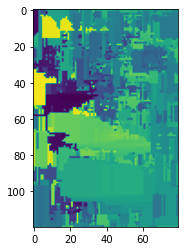

In [23]:
with open("test", "rb") as f:
    tst = np.load(f)
    
plt.imshow(tst)

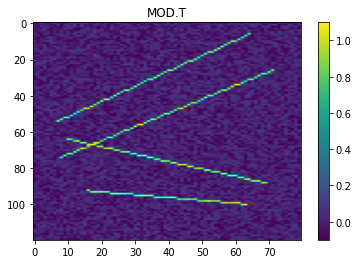

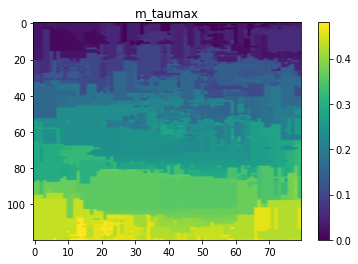

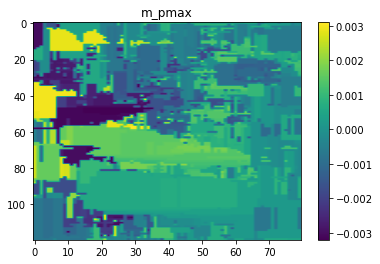

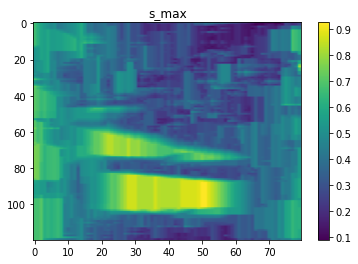

In [24]:
plt.imshow(MOD.T,aspect='auto')
plt.title("MOD.T")
plt.colorbar()
plt.show()

plt.imshow(m_taumax,aspect='auto')
plt.title("m_taumax")
plt.colorbar()
plt.show()

plt.imshow(m_pmax,aspect='auto')
plt.title("m_pmax")
plt.colorbar()
plt.show()

plt.imshow(s_max,aspect='auto')
plt.title("s_max")
plt.colorbar()
plt.show()

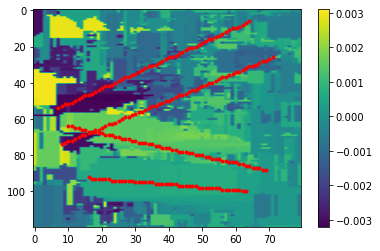

In [25]:
vals_1=[]
vals_2=[]
vals_3=[]
vals_4=[]

for i in range(x_ini_1,x_fim_1):
    z = int(np.round(i*np.cos(theta)) + np.round(3*nt/4))
    plt.imshow(m_pmax, aspect="auto")
    plt.plot(i,z,"r.")
    vals_1.append(m_pmax[z,i])
    
for i in range(x_ini_2,x_fim_2):
    z = int(np.round(i*np.cos(theta2)) + np.round(nt/2))
    plt.imshow(m_pmax, aspect="auto")
    plt.plot(i,z,"r.")
    vals_2.append(m_pmax[z,i])
              
for i in range(x_ini_3,x_fim_3):
    z = int(np.round(i*np.cos(theta3)) + np.round(2*nt/3))
    plt.imshow(m_pmax, aspect="auto")
    plt.plot(i,z,"r.")
    vals_3.append(m_pmax[z,i])
              
for i in range(x_ini_4,x_fim_4):
    z = int(np.round(i*np.cos(theta4)) + np.round(nt/2))
    plt.imshow(m_pmax, aspect="auto")
    plt.plot(i,z,"r.")
    vals_4.append(m_pmax[z,i])
    
plt.colorbar()
plt.show()

In [26]:
import statistics

vals = [vals_1, vals_2, vals_3, vals_4]
pmaxs = [pmaxS1, pmaxS2, pmaxS3, pmaxS4]

for i,z in enumerate(vals):
    mode = np.round(statistics.mode(z),4)
    mean = np.round(statistics.mean(z),5)
    pmax = np.round(pmaxs[i],4)
    print(f"Reta {str(i)} \nmoda={mode}, média={mean}, pmaxS={pmax}\n")

Reta 0 
moda=0.0006, média=0.00063, pmaxS=0.0006

Reta 1 
moda=0.0016, média=0.00115, pmaxS=0.0016

Reta 2 
moda=0.0016, média=-0.00013, pmaxS=-0.003

Reta 3 
moda=-0.0031, média=-0.00146, pmaxS=-0.0034



In [43]:
theta2

20

In [47]:
#pmax está em qual unidade?
#p = angulo (s/m)

#cos(theta2)*dt = 0.0016
#pmax2 = 0.0016

#cos(theta2)*dt = pmax2
#cos(theta2) = pmax2/dt
#theta2 = cos-1(pmax2/dt)

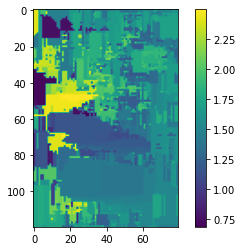

In [83]:
m_theta = np.arccos(m_pmax/dt)
plt.imshow(m_theta)
plt.colorbar()
plt.show()

In [49]:
np.cos(theta2)*dt

0.0016323282472535678

In [58]:
np.arccos(0.0016323282472535678/dt)

1.1504440784612406

In [50]:
np.radians(20)

0.3490658503988659

In [62]:
0.0016323282472535678/dt

0.40808206181339196

In [60]:
np.cos(theta2)

0.40808206181339196

In [82]:
t2=np.degrees(20)
print(np.cos(t2))

-0.7208777924178429


In [85]:
a = np.radians(20)
print(a)
b = np.cos(a)
print(b)
c = np.arccos(b)
print(c)
d = np.degrees(c)
print(d)

0.3490658503988659
0.9396926207859084
0.3490658503988658
19.999999999999993
